# Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel(r"BCM Analysis/bcm_test_sample.xlsx")

In [9]:
data

,Association,Strength [1=weak; 2=medium; 3=strong],"Valence [1=positive, 2=negative, 0=neutral, 3=ambivalent]",Coding Top category,Name Top category,Coding Subcategory,Name Subcategory
0,Breitensport,2,0,59,Gesamtverein,-,-
1,Breitensport,1,0,59,Gesamtverein,-,-
2,Breitensport,2,0,59,Gesamtverein,-,-
3,Breitensport,2,1,59,Gesamtverein,-,-
4,Breitensport,1,0,59,Gesamtverein,-,-
...,...,...,...,...,...,...,...
111,Wahre Liebe,3,1,7,Stadion,-,-
112,zittern,3,3,20,Emotionen,-,-
113,zittern,3,0,20,Emotionen,-,-
114,Zurückhaltung,2,2,15,Management Praktiken,-,-


In [11]:
data.head()

,Association,Strength [1=weak; 2=medium; 3=strong],"Valence [1=positive, 2=negative, 0=neutral, 3=ambivalent]",Coding Top category,Name Top category,Coding Subcategory,Name Subcategory
0,Breitensport,2,0,59,Gesamtverein,-,-
1,Breitensport,1,0,59,Gesamtverein,-,-
2,Breitensport,2,0,59,Gesamtverein,-,-
3,Breitensport,2,1,59,Gesamtverein,-,-
4,Breitensport,1,0,59,Gesamtverein,-,-


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Association                                                116 non-null    object
 1   Strength [1=weak; 2=medium; 3=strong]                      116 non-null    int64 
 2   Valence [1=positive, 2=negative, 0=neutral, 3=ambivalent]  116 non-null    int64 
 3   Coding Top category                                        116 non-null    int64 
 4   Name Top category                                          116 non-null    object
 5   Coding Subcategory                                         116 non-null    object
 6   Name Subcategory                                           116 non-null    object
dtypes: int64(3), object(4)
memory usage: 6.5+ KB


# Graph Creation:

In [16]:
import networkx as nx

In [18]:
G = nx.Graph()

In [30]:
# Loop through each row and create edges from the brand to the association
brand = "Brand"
for _, row in data.iterrows():
    assoc = row['Association']
    strength = row['Strength [1=weak; 2=medium; 3=strong]']
    valence = row['Valence [1=positive, 2=negative, 0=neutral, 3=ambivalent]']

# Add the association node and the edge to the graph
G.add_node(assoc)
G.add_edge(brand, assoc, strength=strength, valence=valence)

# Visualize the Brand Concept Map (BCM):

In [35]:
# Map valence to colors
valence_colors = {0: 'gray', 1: 'green', 2: 'red', 3: 'blue'}
edge_colors = [valence_colors[G.edges[e]['valence']] for e in G.edges()]
edge_widths = [G.edges[e]['strength'] for e in G.edges()]

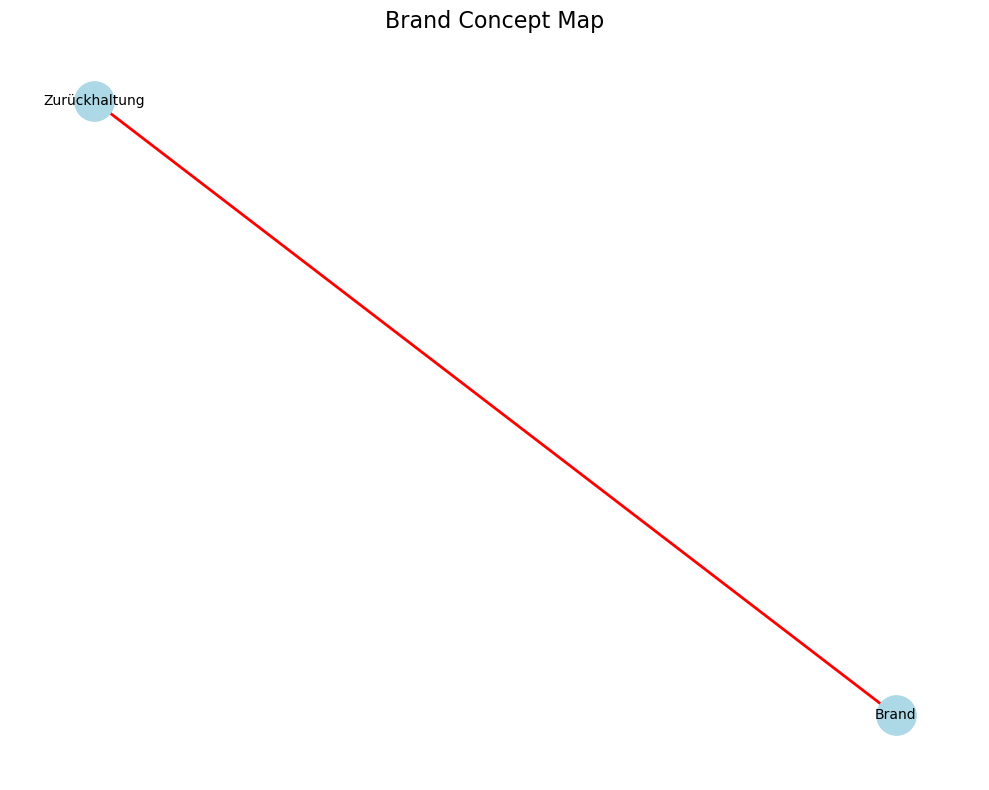

In [37]:
# Graph visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Layout

nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Brand Concept Map", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.savefig("bcm_graph.png", dpi=300)
plt.show()

# Descriptive Statistics of Data:

In [42]:
# Frequency of associations
assoc_freq = data['Association'].value_counts().reset_index()
assoc_freq.columns = ['Association', 'Frequency']

In [46]:
# Frequency of categories
topcat_freq = data['Name Top category'].value_counts().reset_index()
topcat_freq.columns = ['Name Top Category', 'Frequency']

In [48]:
# Average strength and valence per category
strength_stats = data.groupby('Name Top category')['Strength [1=weak; 2=medium; 3=strong]'].mean().reset_index()
valence_stats = data.groupby('Name Top category')['Valence [1=positive, 2=negative, 0=neutral, 3=ambivalent]'].mean().reset_index()

In [50]:
# Export to Excel

with pd.ExcelWriter("bcm_statistics.xlsx") as writer:
    assoc_freq.to_excel(writer, sheet_name="Association Frequency", index=False)
    topcat_freq.to_excel(writer, sheet_name="Top Categories", index=False)
    strength_stats.to_excel(writer, sheet_name="Avg Strength", index=False)
    valence_stats.to_excel(writer, sheet_name="Avg Valence", index=False)

# Style template configuaration:

In [57]:
import os
print(os.getcwd())

C:\Users\Himanshu


In [59]:
# Load the style config from a JSON file:
with open("style_config.json", "r") as f:
    style = json.load(f)

In [61]:
# Prepare style variables for later use
valence_colors = {int(k): v for k, v in style["valence_colors"].items()}
node_color = style.get("node_color", "lightblue")
node_size = style.get("node_size", 800)
font_size = style.get("font_size", 10)
layout_seed = style.get("layout_seed", 42)
edge_transparency = style.get("edge_transparency", 1.0)